# EDA

In [1]:
# Imports

import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', palette='bright', color_codes=True)
sns.set_context('talk')

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import xgboost as xgb

from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import NearMiss

Using TensorFlow backend.
/Users/flatironschool/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/flatironschool/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/flatironschool/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/flatironschool/.local/lib/pytho

In [2]:
# Working with old file from 2016
# Had to specify encoding

df = pd.read_csv('ks-projects-201612.csv', encoding='latin-1')

/Users/flatironschool/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN
5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21 18:30:44,1000,2014-12-01 18:30:44,1205,successful,16,US,1205,NaN,NaN,NaN,NaN
6,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17 19:05:12,25000,2016-02-01 20:05:12,453,failed,40,US,453,NaN,NaN,NaN,NaN
7,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29 18:14:43,125000,2014-04-24 18:14:43,8233,canceled,58,US,8233,NaN,NaN,NaN,NaN
8,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10 21:55:48,65000,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,NaN,NaN,NaN,NaN
9,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09 18:19:37,2500,2013-09-09 18:19:37,0,failed,0,CA,0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 17 columns):
ID                323750 non-null int64
name              323746 non-null object
category          323745 non-null object
main_category     323750 non-null object
currency          323750 non-null object
deadline          323750 non-null object
goal              323750 non-null object
launched          323750 non-null object
pledged           323750 non-null object
state             323750 non-null object
backers           323750 non-null object
country           323750 non-null object
usd pledged       319960 non-null object
Unnamed: 13       625 non-null object
Unnamed: 14       12 non-null object
Unnamed: 15       4 non-null object
Unnamed: 16       1 non-null float64
dtypes: float64(1), int64(1), object(15)
memory usage: 42.0+ MB


In [5]:
df.describe()

,ID,Unnamed: 16
count,3.237500e+05,1.0
mean,1.074943e+09,25.0
std,6.193352e+08,NaN
min,5.971000e+03,25.0
25%,5.375802e+08,25.0
50%,1.075818e+09,25.0
75%,1.611070e+09,25.0
max,2.147476e+09,25.0


In [6]:
df.isna().sum()

ID                     0
name                   4
category               5
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3790
Unnamed: 13       323125
Unnamed: 14       323738
Unnamed: 15       323746
Unnamed: 16       323749
dtype: int64

In [7]:
df = df.drop(['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], axis=1)

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

ID                0
name              0
category          0
main_category     0
currency          0
deadline          0
goal              0
launched          0
pledged           0
state             0
backers           0
country           0
usd pledged       0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319951 entries, 0 to 323749
Data columns (total 13 columns):
ID                319951 non-null int64
name              319951 non-null object
category          319951 non-null object
main_category     319951 non-null object
currency          319951 non-null object
deadline          319951 non-null object
goal              319951 non-null object
launched          319951 non-null object
pledged           319951 non-null object
state             319951 non-null object
backers           319951 non-null object
country           319951 non-null object
usd pledged       319951 non-null object
dtypes: int64(1), object(12)
memory usage: 34.2+ MB


In [11]:
df.columns

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged '],
      dtype='object')

In [12]:
# Removed whitespace at the end of the column names

df.columns = df.columns.str.rstrip()

In [13]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged'],
      dtype='object')

In [14]:
# df.astype({'goal': 'float64'})
# ValueError: could not convert string to float: '2016-02-02 00:56:46'

In [15]:
# Investigated the error

df[df['goal'] == '2016-02-02 00:56:46']

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
1454,1008705746,Zephyra´s new full length,'As The World Collapses',Metal,Music,SEK,2016-02-02 00:56:46,15000,2016-01-03 00:56:46,4262,failed,14,SE


In [16]:
df.loc[df['ID'] == 1008705746, 'goal'] = 15000
df.loc[df['ID'] == 1008705746, 'launched'] = '2016-02-02 00:56:46'

In [17]:
df.loc[df['ID'] == 1008705746]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
1454,1008705746,Zephyra´s new full length,'As The World Collapses',Metal,Music,SEK,15000,2016-02-02 00:56:46,2016-01-03 00:56:46,4262,failed,14,SE


In [18]:
df.groupby('country').count()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,usd pledged
country,,,,,,,,,,,,
0,102,102,102,102,102,102,102,102,102,102,102,102
1,72,72,72,72,72,72,72,72,72,72,72,72
10,13,13,13,13,13,13,13,13,13,13,13,13
107,1,1,1,1,1,1,1,1,1,1,1,1
108,2,2,2,2,2,2,2,2,2,2,2,2
109,1,1,1,1,1,1,1,1,1,1,1,1
11,3,3,3,3,3,3,3,3,3,3,3,3
110,1,1,1,1,1,1,1,1,1,1,1,1
111,1,1,1,1,1,1,1,1,1,1,1,1


In [19]:
df.loc[df['country'].isin(['US', 'GB', 'CA'])]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375
5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21 18:30:44,1000,2014-12-01 18:30:44,1205,successful,16,US,1205
6,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17 19:05:12,25000,2016-02-01 20:05:12,453,failed,40,US,453
7,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29 18:14:43,125000,2014-04-24 18:14:43,8233,canceled,58,US,8233
8,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10 21:55:48,65000,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57
9,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09 18:19:37,2500,2013-09-09 18:19:37,0,failed,0,CA,0


In [20]:
# Decided to work with relevant countries with more observations

df = df.loc[df['country'].isin(['US', 'GB', 'CA'])]

In [21]:
df.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375
5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21 18:30:44,1000,2014-12-01 18:30:44,1205,successful,16,US,1205
6,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17 19:05:12,25000,2016-02-01 20:05:12,453,failed,40,US,453
7,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29 18:14:43,125000,2014-04-24 18:14:43,8233,canceled,58,US,8233
8,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10 21:55:48,65000,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57
9,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09 18:19:37,2500,2013-09-09 18:19:37,0,failed,0,CA,0


In [22]:
df = df.astype({'goal': 'float64', 'pledged': 'float64', 'backers': 'int64'})

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297062 entries, 0 to 323749
Data columns (total 13 columns):
ID               297062 non-null int64
name             297062 non-null object
category         297062 non-null object
main_category    297062 non-null object
currency         297062 non-null object
deadline         297062 non-null object
goal             297062 non-null float64
launched         297062 non-null object
pledged          297062 non-null float64
state            297062 non-null object
backers          297062 non-null int64
country          297062 non-null object
usd pledged      297062 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 31.7+ MB


In [24]:
# Changed the format of launched and deadline to datetime for manipulation

df['deadline'] = pd.to_datetime(df['deadline']).dt.date
df['launched'] = pd.to_datetime(df['launched']).dt.date

In [25]:
# Created new column with the amount of days each project has to reach the goal

df['time_days'] = df['deadline'] - df['launched']

In [26]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,time_days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,failed,0,GB,0,59 days
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,failed,3,US,220,45 days
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,failed,1,US,1,30 days
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.0,canceled,14,US,1283,56 days
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26,52375.0,successful,224,US,52375,35 days


In [27]:
# Extracted just the amount of days from the datetime format

df['time_days'] = df['time_days'].dt.days

In [28]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,time_days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,failed,0,GB,0,59
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,failed,3,US,220,45
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,failed,1,US,1,30
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.0,canceled,14,US,1283,56
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26,52375.0,successful,224,US,52375,35


In [29]:
# Extracted just the month from the launch date

df['launched'] = df['launched'].apply(lambda d: d.month)

In [30]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,time_days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,8,0.0,failed,0,GB,0,59
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,1,220.0,failed,3,US,220,45
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,3,1.0,failed,1,US,1,30
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,7,1283.0,canceled,14,US,1283,56
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2,52375.0,successful,224,US,52375,35


In [31]:
df.groupby(['country', 'state']).count()

ID    name  category  main_category  currency  \
country state                                                           
CA      canceled      1762    1762      1762           1762      1762   
        failed        6832    6832      6832           6832      6832   
        live           233     233       233            233       233   
        successful    3067    3067      3067           3067      3067   
        suspended       98      98        98             98        98   
GB      canceled      3112    3112      3112           3112      3112   
        failed       14479   14479     14479          14479     14479   
        live           431     431       431            431       431   
        successful    9340    9340      9340           9340      9340   
        suspended      146     146       146            146       146   
US      canceled     24488   24488     24488          24488     24488   
        failed      133594  133594    133594         133594    133594   
        live          2708    2708      2708           2708      2708   
        successful   95770   95770     95770          95770     95770   
        suspended     1002    1002      1002           1002      1002   

                    deadline    goal  launched  pledged  backers  usd pledged  \
country state                                                                   
CA      canceled        1762    1762      1762     1762     1762         1762   
        failed          6832    6832      6832     6832     6832         6832   
        live             233     233       233      233      233          233   
        successful      3067    3067      3067     3067     3067         3067   
        suspended         98      98        98       98       98           98   
GB      canceled        3112    3112      3112     3112     3112         3112   
        failed         14479   14479     14479    14479    14479        14479   
        live             431     431       431      431      431          431   
        successful      9340    9340      9340     9340     9340         9340   
        suspended        146     146       146      146      146          146   
US      canceled       24488   24488     24488    24488    24488        24488   
        failed        133594  133594    133594   133594   133594       133594   
        live            2708    2708      2708     2708     2708         2708   
        successful     95770   95770     95770    95770    95770        95770   
        suspended       1002    1002      1002     1002     1002         1002   

                    time_days  
country state                  
CA      canceled         1762  
        failed           6832  
        live              233  
        successful       3067  
        suspended          98  
GB      canceled         3112  
        failed          14479  
        live              431  
        successful       9340  
        suspended         146  
US      canceled        24488  
        failed         133594  
        live             2708  
        successful      95770  
        suspended        1002

In [32]:
# Dropped the live projects

df = df[df['state'] != 'live']

In [33]:
# Classified canceled and suspended projects as failed as well; binary state

df['state'] = df['state'].map({'successful': 1, 'failed': 0, 'canceled': 0, 'suspended': 0})

In [34]:
df.groupby(['country', 'state']).count()

ID    name  category  main_category  currency  deadline  \
country state                                                                
CA      0        8692    8692      8692           8692      8692      8692   
        1        3067    3067      3067           3067      3067      3067   
GB      0       17737   17737     17737          17737     17737     17737   
        1        9340    9340      9340           9340      9340      9340   
US      0      159084  159084    159084         159084    159084    159084   
        1       95770   95770     95770          95770     95770     95770   

                 goal  launched  pledged  backers  usd pledged  time_days  
country state                                                              
CA      0        8692      8692     8692     8692         8692       8692  
        1        3067      3067     3067     3067         3067       3067  
GB      0       17737     17737    17737    17737        17737      17737  
        1        9340      9340     9340     9340         9340       9340  
US      0      159084    159084   159084   159084       159084     159084  
        1       95770     95770    95770    95770        95770      95770

In [35]:
us = df[df['country'] == 'US']

In [36]:
us.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,time_days
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,1,220.00,0,3,US,220,45
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,3,1.00,0,1,US,1,30
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,7,1283.00,0,14,US,1283,56
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2,52375.00,1,224,US,52375,35
5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,12,1205.00,1,16,US,1205,20
6,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2,453.00,0,40,US,453,45
7,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,4,8233.00,0,58,US,8233,35
8,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,7,6240.57,0,43,US,6240.57,30
10,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,3,12700.00,1,100,US,12700,30
11,1000055792,The Cottage Market,Crafts,Crafts,USD,2014-10-02,5000.0,9,0.00,0,0,US,0,30


In [37]:
us.groupby(['main_category', 'state']).count()

ID   name  category  currency  deadline   goal  \
main_category state                                                      
Art           0      11203  11203     11203     11203     11203  11203   
              1       8264   8264      8264      8264      8264   8264   
Comics        0       3484   3484      3484      3484      3484   3484   
              1       3833   3833      3833      3833      3833   3833   
Crafts        0       4119   4119      4119      4119      4119   4119   
              1       1358   1358      1358      1358      1358   1358   
Dance         0       1010   1010      1010      1010      1010   1010   
              1       1902   1902      1902      1902      1902   1902   
Design        0      11620  11620     11620     11620     11620  11620   
              1       6167   6167      6167      6167      6167   6167   
Fashion       0      10399  10399     10399     10399     10399  10399   
              1       3356   3356      3356      3356      3356   3356   
Film & Video  0      29376  29376     29376     29376     29376  29376   
              1      18396  18396     18396     18396     18396  18396   
Food          0      12581  12581     12581     12581     12581  12581   
              1       4711   4711      4711      4711      4711   4711   
Games         0      12715  12715     12715     12715     12715  12715   
              1       7445   7445      7445      7445      7445   7445   
Journalism    0       2355   2355      2355      2355      2355   2355   
              1        702    702       702       702       702    702   
Music         0      19261  19261     19261     19261     19261  19261   
              1      19935  19935     19935     19935     19935  19935   
Photography   0       5017   5017      5017      5017      5017   5017   
              1       2324   2324      2324      2324      2324   2324   
Publishing    0      19066  19066     19066     19066     19066  19066   
              1       8595   8595      8595      8595      8595   8595   
Technology    0      13700  13700     13700     13700     13700  13700   
              1       3864   3864      3864      3864      3864   3864   
Theater       0       3178   3178      3178      3178      3178   3178   
              1       4918   4918      4918      4918      4918   4918   

                     launched  pledged  backers  country  usd pledged  \
main_category state                                                     
Art           0         11203    11203    11203    11203        11203   
              1          8264     8264     8264     8264         8264   
Comics        0          3484     3484     3484     3484         3484   
              1          3833     3833     3833     3833         3833   
Crafts        0          4119     4119     4119     4119         4119   
              1          1358     1358     1358     1358         1358   
Dance         0          1010     1010     1010     1010         1010   
              1          1902     1902     1902     1902         1902   
Design        0         11620    11620    11620    11620        11620   
              1          6167     6167     6167     6167         6167   
Fashion       0         10399    10399    10399    10399        10399   
              1          3356     3356     3356     3356         3356   
Film & Video  0         29376    29376    29376    29376        29376   
              1         18396    18396    18396    18396        18396   
Food          0         12581    12581    12581    12581        12581   
              1          4711     4711     4711     4711         4711   
Games         0         12715    12715    12715    12715        12715   
              1          7445     7445     7445     7445         7445   
Journalism    0          2355     2355     2355     2355         2355   
              1           702      702      702      702          702   
Music         0         19261    19261    19261  

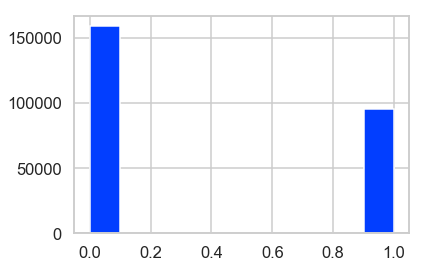

In [38]:
us['state'].hist()

In [39]:
us.groupby('state').count()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd pledged,time_days
state,,,,,,,,,,,,,
0,159084,159084,159084,159084,159084,159084,159084,159084,159084,159084,159084,159084,159084
1,95770,95770,95770,95770,95770,95770,95770,95770,95770,95770,95770,95770,95770


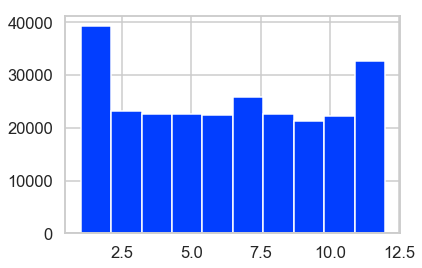

In [40]:
us['launched'].hist()

In [41]:
us['time_days'].mean()

35.02290330934574

In [42]:
us['time_days'].min()

1

In [43]:
us['time_days'].max()

14867

In [44]:
us[us['time_days'] == 14867]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,time_days
2443,1014746686,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,USD,2010-09-15,5000.0,1,0.0,0,0,US,0,14867


In [45]:
us[us['name'].str.endswith('(Canceled)')]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,time_days
8,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,7,6240.57,0,43,US,6240.57,30
83,10003650,Glyscian Debut Album Recording (Canceled),Rock,Music,USD,2012-05-26,15000.0,3,151.00,0,4,US,151,60
178,1000827504,The JANIS JOPLIN Project (Canceled),Photography,Photography,USD,2012-08-21,11000.0,7,75.00,0,1,US,75,42
203,100101652,Objecthood: A Story of an Imagined Economy (Ca...,Art Books,Publishing,USD,2011-08-12,15000.0,7,25.00,0,1,US,25,21
266,100134337,Danger! Extreme Lawn Darts (Canceled),Video Games,Games,USD,2012-05-30,10000.0,5,60.00,0,3,US,60,15
299,1001548662,Audience of Death (Canceled),Fiction,Publishing,USD,2015-04-17,4500.0,3,0.00,0,0,US,0,45
312,1001600663,CLEX - 4 in 1 Smart Device (Canceled),Gadgets,Technology,USD,2016-07-18,50000.0,6,5650.00,0,22,US,5650,35
350,1001856035,The Daisy Dare Project (Canceled),Mixed Media,Art,USD,2011-12-10,2000.0,11,0.00,0,0,US,0,36
376,100207951,Face-To-Face: Short Film (Canceled),Shorts,Film & Video,USD,2012-07-14,600.0,6,10.00,0,1,US,10,17
408,1002226766,GLAMAZON: Publishing Campaign! (Canceled),Fiction,Publishing,USD,2014-08-09,16000.0,6,375.00,0,5,US,375,60


In [46]:
us[us['time_days'] > 92]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,time_days
2443,1014746686,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,USD,2010-09-15,5000.0,1,0.0,0,0,US,0,14867
41237,1245461087,1st Super-Size Painting - Social Network Owned...,Art,Art,USD,2010-08-14,15000.0,1,0.0,0,0,US,0,14835
64541,1384087152,"""ICHOR"" (Canceled)",Film & Video,Film & Video,USD,2010-05-21,700.0,1,0.0,0,0,US,0,14750
80906,1480763647,"Support Solo Theater! Help ""Ungrateful Daughte...",Theater,Theater,USD,2010-06-01,4000.0,1,0.0,0,0,US,0,14761
212155,330942060,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",Music,Music,USD,2010-05-04,10000.0,1,0.0,0,0,US,0,14733
234252,462917959,Identity Communications Infographic (Canceled),Design,Design,USD,2010-04-10,500.0,1,0.0,0,0,US,0,14709


In [47]:
us = us.drop(us[us['time_days'] > 92].index)

In [48]:
us['time_days'].max()

92